In [2]:
import pandas as pd

In [3]:
# from the top25 cwes, get the ones that are language independent
top25 = pd.read_csv('./docs/top25_cwes.csv')

top25_filtered = top25[top25['LANGUAGES'] == "['Not-Language-Specific']"] 
top25_filtered.drop(columns=['Unnamed: 0'], inplace=True)

C:\Users\claud\AppData\Local\Temp\ipykernel_5424\2075864243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top25_filtered.drop(columns=['Unnamed: 0'], inplace=True)


In [6]:
cwes = top25_filtered['CWE'].values # only 16 cwes, not-language-specific

In [64]:
# Handling MSR_data_cleaned (https://github.com/ZeoVan/MSR_20_Code_vulnerability_CSV_Dataset)
# Only C/C++ 

# COLUMN.func_before: function before the vulnerability being fixed (if "vul" labeled as "1", then this is the vulnerable function)
# COLUMN.func_after : function after the vulnerability being fixed
# COLUMN.vul	    : "1" means vulnerable function and "0" means non-vulnerable function

msr = pd.read_csv('./docs/datasets/MSR_data_cleaned.csv')
msr_filtered = msr[msr['CWE ID'].isin(cwes)] 


# Get only rows with vulnerabilities and patches
vulnerable_samples = msr_filtered[msr_filtered['vul'] == 1]

counter = 0
for i, row in vulnerable_samples.iterrows():
    if row['func_after'] == row['func_before']:
        vulnerable_samples.drop(i, inplace=True)


# Plot CWE distribution
vulnerable_samples['CWE ID'].value_counts().plot(kind='barh')

C:\Users\claud\AppData\Local\Temp\ipykernel_5424\115099630.py:8: DtypeWarning: Columns (20,22,23,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  msr = pd.read_csv('./docs/datasets/MSR_data_cleaned.csv')
C:\Users\claud\AppData\Local\Temp\ipykernel_5424\115099630.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vulnerable_samples.drop(i, inplace=True)


<AxesSubplot:>

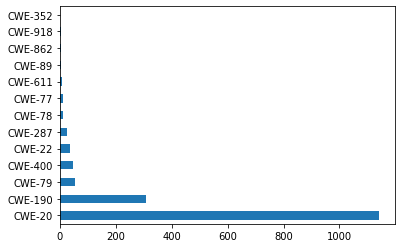